## Task 1) Linear Regression -stochastic gradient Descent 

Let $L$ be defined as:

$$
L = \frac{1}{2}(\hat{y} - y)^2 + \frac{\lambda}{2} \|w\|^2
$$

where 

$$
\hat{y} = x \cdot w + b
$$

The partial differentiation of $L$ with respect to $w$ is:

$$
\frac{\partial L}{\partial w} = (\hat{y} - y) \cdot x + \lambda w
$$

The partial differentiation of $L$ with respect to $b$ is:

$$
\frac{\partial L}{\partial b} = \hat{y} - y
$$

### Definitions:

- \( y \): actual value of \( y \)
- \( w \): weights
- \( b \): bias
- \( L \): loss
- ($\hat{y}$): the learning rate.  



In [1]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml
from prml.preprocess import PolynomialFeature 
import numpy as np
import torch
import matplotlib.pyplot as plt

  Cloning https://github.com/pantelis-classes/PRML.git to /private/var/folders/bb/st8mqs7n6dl2vsyc4_39_ts00000gn/T/pip-install-r_9nl_zz/prml_af314a4f2a9144f1b4e1950ef48bc8f2
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /private/var/folders/bb/st8mqs7n6dl2vsyc4_39_ts00000gn/T/pip-install-r_9nl_zz/prml_af314a4f2a9144f1b4e1950ef48bc8f2
  Resolved https://github.com/pantelis-classes/PRML.git to commit 6c7ef85da419a644a4a4feb7ab538d2f4f15d46b
  Preparing metadata (setup.py) ... done


Creating Dataset based with sine as Loss function

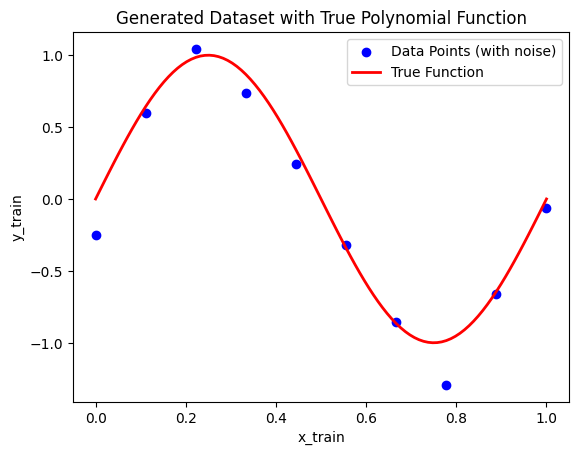

In [2]:

def dataset(sample_size,std,domain=[0,1]):
    x = np.linspace(domain[0], domain[1], sample_size)  # 100 points in the range [-1, 1]
    np.random.shuffle(x)
    y= np.sin(2*np.pi*x) + np.random.normal(scale=std, size=x.shape)
    return x,y


x_train,y_train=dataset(10,0.25)
x_test = np.linspace(0,1,100)
y_test = np.sin(2*np.pi*x_test)


# Plot the generated data points and the true function
plt.scatter(x_train, y_train, label='Data Points (with noise)', color='blue')
plt.plot(x_test, y_test, label='True Function', color='red', linewidth=2)
plt.title('Generated Dataset with True Polynomial Function')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()


In [3]:
# Transform x to polynomial features of degree 9 (M=9)
degree = 10
x_train = x_train[:, None]  # Reshape to a column vector
x_polynomial = PolynomialFeature(degree).transform(x_train)

# Display the shape of the transformed input
print(f'Shape of original x: {x_train.shape}')
print(f'Shape of x_polynomial (degree={degree}): {x_polynomial.shape}')


Shape of original x: (10, 1)
Shape of x_polynomial (degree=10): (10, 11)


In [4]:
x_tensor = torch.tensor(x_polynomial, dtype=torch.float32)  # Input features
y_tensor = torch.tensor(y_train, dtype=torch.float32) 

In [5]:
x_tensor

tensor([[1.0000e+00, 8.8889e-01, 7.9012e-01, 7.0233e-01, 6.2430e-01, 5.5493e-01,
         4.9327e-01, 4.3846e-01, 3.8974e-01, 3.4644e-01, 3.0795e-01],
        [1.0000e+00, 7.7778e-01, 6.0494e-01, 4.7051e-01, 3.6595e-01, 2.8463e-01,
         2.2138e-01, 1.7218e-01, 1.3392e-01, 1.0416e-01, 8.1013e-02],
        [1.0000e+00, 6.6667e-01, 4.4444e-01, 2.9630e-01, 1.9753e-01, 1.3169e-01,
         8.7791e-02, 5.8528e-02, 3.9018e-02, 2.6012e-02, 1.7342e-02],
        [1.0000e+00, 3.3333e-01, 1.1111e-01, 3.7037e-02, 1.2346e-02, 4.1152e-03,
         1.3717e-03, 4.5725e-04, 1.5242e-04, 5.0805e-05, 1.6935e-05],
        [1.0000e+00, 4.4444e-01, 1.9753e-01, 8.7791e-02, 3.9018e-02, 1.7342e-02,
         7.7073e-03, 3.4255e-03, 1.5224e-03, 6.7664e-04, 3.0073e-04],
        [1.0000e+00, 2.2222e-01, 4.9383e-02, 1.0974e-02, 2.4387e-03, 5.4192e-04,
         1.2043e-04, 2.6762e-05, 5.9470e-06, 1.3216e-06, 2.9368e-07],
        [1.0000e+00, 5.5556e-01, 3.0864e-01, 1.7147e-01, 9.5260e-02, 5.2922e-02,
         2.94

In [6]:
features= x_tensor.shape[1]
weights=torch.zeros(features ,dtype=torch.float32, requires_grad=True)
bias = torch.zeros(1, dtype=torch.float32, requires_grad=False)

In [7]:
weights.shape

torch.Size([11])

In [8]:
x_tensor.shape

torch.Size([10, 11])

Defining loss fucntions with and without regularisation

In [9]:
def loss_func(y_pred,y_ten,weights,lambda_regularisation=0.1):
    b= torch.sum(weights**2)
    c= (lambda_regularisation )/2 
    a=torch.sum((y_pred - y_ten)**2)
    return (a/2 +b*c)

In [10]:
def loss_func_without_reg(y_pred,y_tensor,weights_without_reg):
    return torch.sum((y_pred-y_tensor)**2)


$$
\text{weight gradient} = (\hat{y} - y[i]) \cdot x[i] + \lambda \cdot w
$$

$$
\text{bias gradient} = (\hat{y} - y[i])
$$

$$
w = w - \eta \cdot \text{weight gradient}
$$

$$
b = b - \eta \cdot \text{bias gradient}
$$

Where:
- $\eta$: the learning rate.  
- $\lambda$: the regularization constant.


In [11]:
# calc weights without regularsation 
weights_without_reg=torch.zeros(features ,dtype=torch.float32, requires_grad=True)
bias_without_reg = torch.zeros(1, dtype=torch.float32, requires_grad=True)
learning_rate=0.1

for epoch in range(1000):
    for i in range(x_tensor.shape[0]):
        y_pred= torch.dot(x_tensor[i],weights_without_reg)+bias
        loss= loss_func_without_reg(y_pred,y_tensor[i],weights_without_reg)
        grad_loss_weight= (y_pred-y_tensor[i]) * x_tensor[i] 
        gard_loss_bais = (y_pred-y_tensor[i])
        weights_without_reg = weights_without_reg - learning_rate* grad_loss_weight
        bias_without_reg = bias_without_reg - learning_rate * gard_loss_bais 
    # print(loss.item())


Doing similarly for With regularisation , updating weights, bias

In [12]:
def program(lambda_regularisation,learning_rate,x_tensor,y_tensor,all_epochs=1000):
    weights=torch.zeros(features ,dtype=torch.float32, requires_grad=True)
    bias = torch.zeros(1, dtype=torch.float32, requires_grad=True)
    all_loss=[]
    
    for epoch in range(all_epochs):
        total_loss=0
        for i in range(x_tensor.shape[0]):
            # print(f"x_tensor[i].shape: {x_tensor[i].shape}, weights.shape: {weights.shape}")
            
            # Forward pass: Compute prediction
            y_pred = torch.dot(x_tensor[i], weights) + bias  # Check if y_pred is a scalar
            # print(f"y_pred: {y_pred}, y_pred.shape: {y_pred.shape}")
            # y_pred= torch.dot(x_tensor[i],weights)+bias
    
            loss= loss_func(y_pred,y_tensor[i],weights,lambda_regularisation)
            # print(f"loss is :{loss}")
            grad_loss_weights= (y_pred-y_tensor[i]) * x_tensor[i] + lambda_regularisation * weights 
            grad_loss_bias = (y_pred-y_tensor[i])
            weights = weights - learning_rate* grad_loss_weights
            bias = bias - learning_rate* grad_loss_bias
            total_loss+=loss.item()
        all_loss.append(loss.item())
    return all_loss,weights,bias
        

Trying to experiment for differnt values of $\lambda$ , fixing $\eta$ learning rate

lr value :0.01, la value is :0.01
lr value :0.02, la value is :0.01
lr value :0.03, la value is :0.01
lr value :0.04, la value is :0.01
lr value :0.05, la value is :0.01
lr value :0.060000000000000005, la value is :0.01
lr value :0.07, la value is :0.01
lr value :0.08, la value is :0.01
lr value :0.09, la value is :0.01
lr value :0.09999999999999999, la value is :0.01


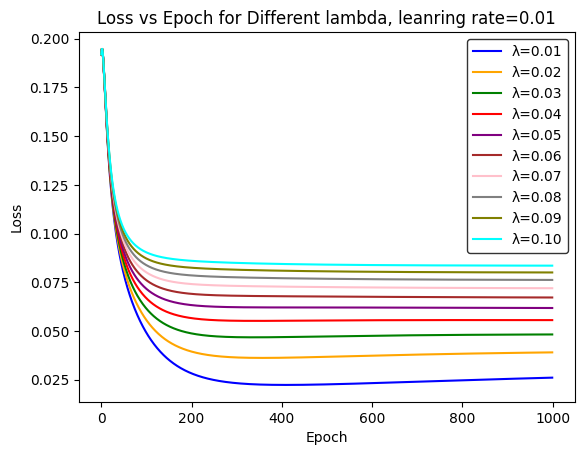

In [13]:
#for differnt value oflambda, leanring rate 
la=0.01
lr=0.01
col=0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
while la<0.1:
    print("lr value :{}, la value is :{}".format(la,lr))
    all_loss,weight,bias=program(la,lr,x_tensor,y_tensor)
    plt.plot(all_loss,color=colors[col % len(colors)],label=f'λ={la:.2f}')
    
    col+=1
    la+=0.01
plt.title(f'Loss vs Epoch for Different lambda, leanring rate={lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Customize the legend with a box around it
plt.legend(loc='best', frameon=True, edgecolor='black')  # Adds a box with black edges

plt.show()

Trying to experiment for differnt values of $\eta$, fixing $\lambda$ , regularisation parameter

lr value :0.01, la value is :0.01
lr value :0.01, la value is :0.02
lr value :0.01, la value is :0.03
lr value :0.01, la value is :0.04
lr value :0.01, la value is :0.05
lr value :0.01, la value is :0.060000000000000005
lr value :0.01, la value is :0.07
lr value :0.01, la value is :0.08
lr value :0.01, la value is :0.09
lr value :0.01, la value is :0.09999999999999999


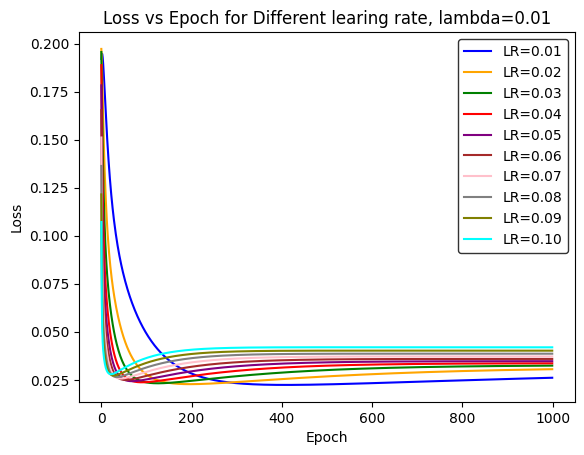

In [14]:
#for differnt value oflambda, leanring rate 
la=0.01
lr=0.01
col=0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
while lr<0.1:
    print("lr value :{}, la value is :{}".format(la,lr))
    all_loss,weight,bias=program(la,lr,x_tensor,y_tensor)
    plt.plot(all_loss,color=colors[col % len(colors)],label=f'LR={lr:.2f}')
    
    col+=1
    lr+=0.01
plt.title(f'Loss vs Epoch for Different learing rate, lambda={la}')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Customize the legend with a box around it
plt.legend(loc='best', frameon=True, edgecolor='black')  # Adds a box with black edges

plt.show()

Via graphs found out that $\lambda$=0.01 $\eta$=0.04 gives lesser loss

In [15]:
la=0.01
lr=0.01
all_loss,weights,bias= program (la,lr,x_tensor,y_tensor)

Text(0.5, 1.0, 'epoch vs loss for lambda=0.01 and learning rate=0.01')

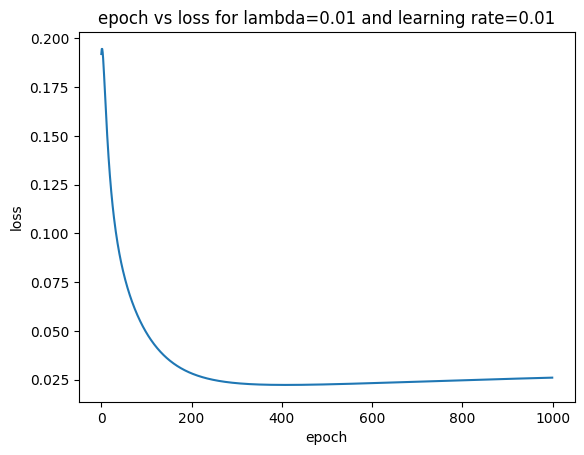

In [16]:
plt.plot(all_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title(f'epoch vs loss for lambda={la} and learning rate={lr}')

In [17]:
x_tensor.shape

torch.Size([10, 11])

In [18]:
x_test

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Now that we trained our weights, bias , check for test set

In [19]:
x_test_polynomial = PolynomialFeature(degree).transform(x_test)
x_test_tensor = torch.tensor(x_test_polynomial, dtype=torch.float32) 

In [20]:
bias

tensor([0.3733], grad_fn=<SubBackward0>)

In [21]:
bias_without_reg

tensor([0.2038], grad_fn=<SubBackward0>)

In [22]:
y_test_pred_without_reg=torch.matmul(x_test_tensor,weights_without_reg)+bias_without_reg
y_test_pred= torch.matmul(x_test_tensor,weights)+bias

In [23]:
weights

tensor([ 0.1714, -0.4127, -1.1499, -0.8835, -0.4752, -0.1175,  0.1600,  0.3665,
         0.5174,  0.6265,  0.7050], grad_fn=<SubBackward0>)

In [24]:
weights_without_reg

tensor([ 0.2038,  2.7831, -4.8151, -3.0624, -0.6625,  0.8769,  1.5424,  1.5715,
         1.1857,  0.5485, -0.2277], grad_fn=<SubBackward0>)

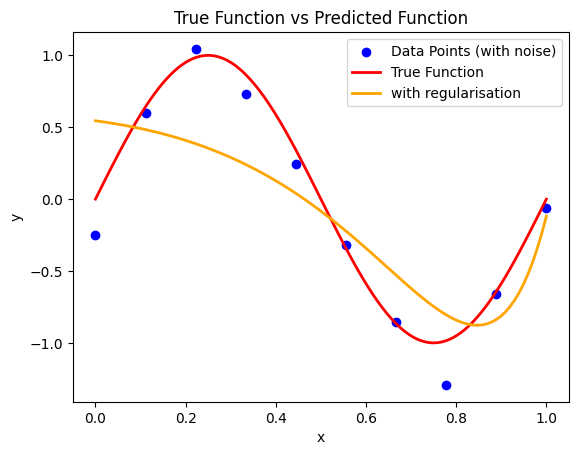

In [25]:

plt.scatter(x_train,y_train,label='Data Points (with noise)', color='blue')
#true function 
# x_test_polynomial = PolynomialFeature(degree).transform(x_test)
plt.plot(x_test, y_test, label='True Function', color='red', linewidth=2)
plt.plot(x_test,y_test_pred.detach().numpy(),label='with regularisation',color='orange',linewidth=2)

plt.title('True Function vs Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

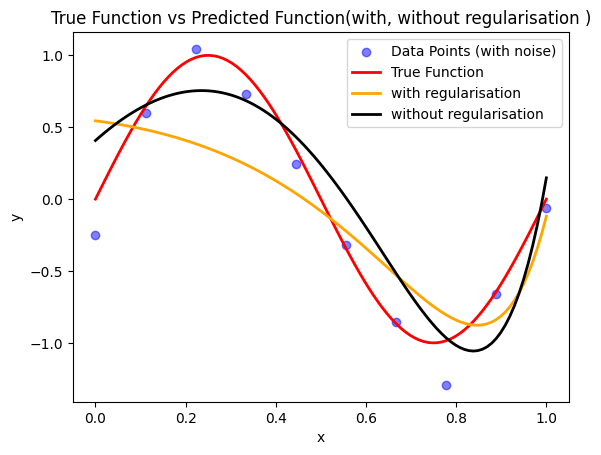

In [26]:
sorted_indices = np.argsort(x_test)
plt.scatter(x_train, y_train, label='Data Points (with noise)', color='blue', alpha=0.5)
plt.plot(x_test[sorted_indices], y_test[sorted_indices], label='True Function', color='red', linewidth=2)

# Plotting the predicted values with regularization
plt.plot(x_test[sorted_indices], y_test_pred[sorted_indices].detach().numpy(), label='with regularisation', color='orange', linewidth=2)

# Plotting the predicted values without regularization
plt.plot(x_test[sorted_indices], y_test_pred_without_reg[sorted_indices].detach().numpy(), label='without regularisation', color='black', linewidth=2)
plt.title('True Function vs Predicted Function(with, without regularisation )')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()



Hence, SGD reduces loss and overfitting